In [ ]:
import pandas as pd

url = 'https://fred.stlouisfed.org/series/RCCCBBALTOT/downloaddata/RCCCBBALTOT.csv'  # Use the direct link to the CSV file
data = pd.read_csv(url)
data.head()

In [ ]:
import pandas as pd

url = 'https://fred.stlouisfed.org/series/RCCCBBALTOT/downloaddata/RCCCBBALTOT.csv'  # Use the direct link to the CSV file
data = pd.read_csv(url)

# Convert 'DATE' column to DatetimeIndex before setting it as index
data['DATE'] = pd.to_datetime(data['DATE'])
data.set_index("DATE", inplace=True)

yearly_data = data.resample('YE').mean()


print("\nYearly Data:")
print(yearly_data.head())



Yearly Data:
               VALUE
DATE                
2012-12-31  586.4050
2013-12-31  573.7950
2014-12-31  581.0675
2015-12-31  603.5925
2016-12-31  637.7850


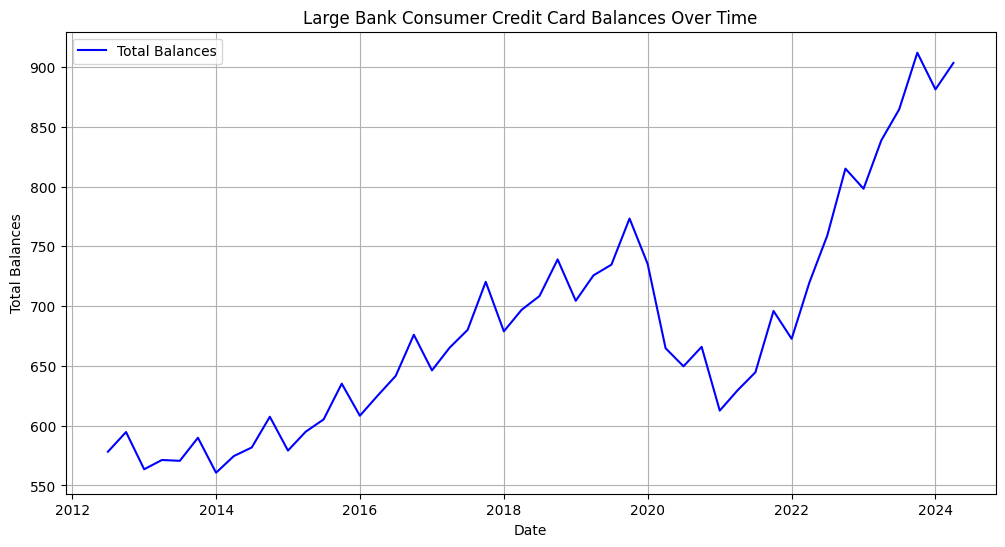

In [9]:
import matplotlib.pyplot as plt

# plot the OG data
plt.figure(figsize= (12,6))
plt.plot(data.index, data['VALUE'], label="Total Balances", color="b")
plt.title("Large Bank Consumer Credit Card Balances Over Time")
plt.xlabel("Date")
plt.ylabel("Total Balances")
plt.legend()
plt.grid(True)
plt.show()

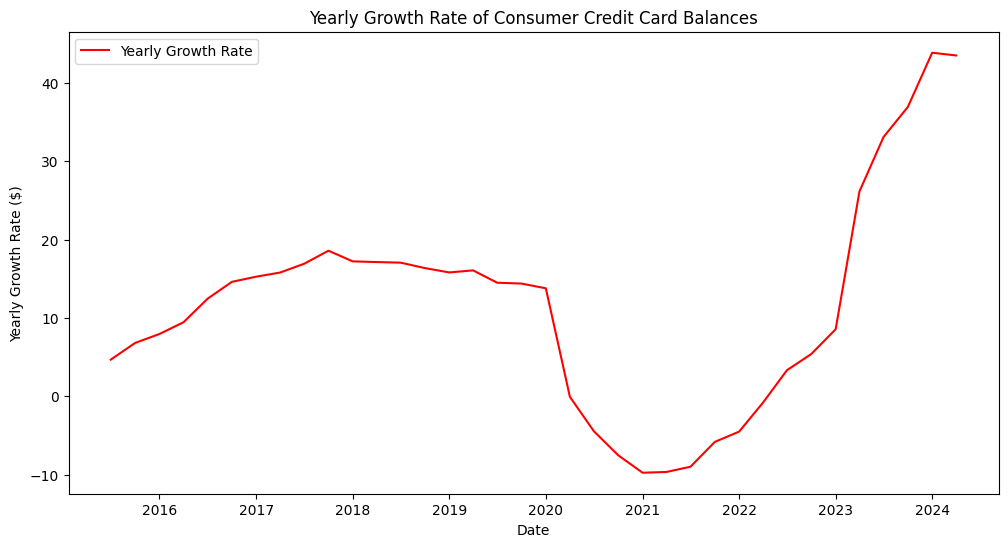

In [ ]:
data['Yearly Growth Rate'] = data['VALUE'].pct_change(12) * 100

# Yearly Growth Rate
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Yearly Growth Rate'], label="Yearly Growth Rate", color="r")
plt.title("Yearly Growth Rate of Consumer Credit Card Balances")
plt.xlabel("Date")
plt.ylabel("Yearly Growth Rate ($)")
plt.legend()

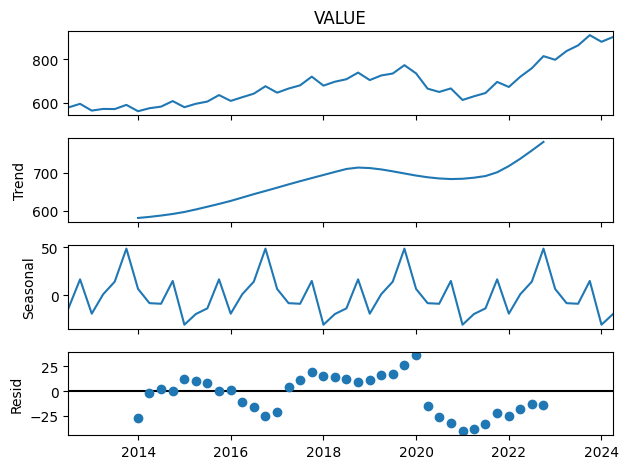

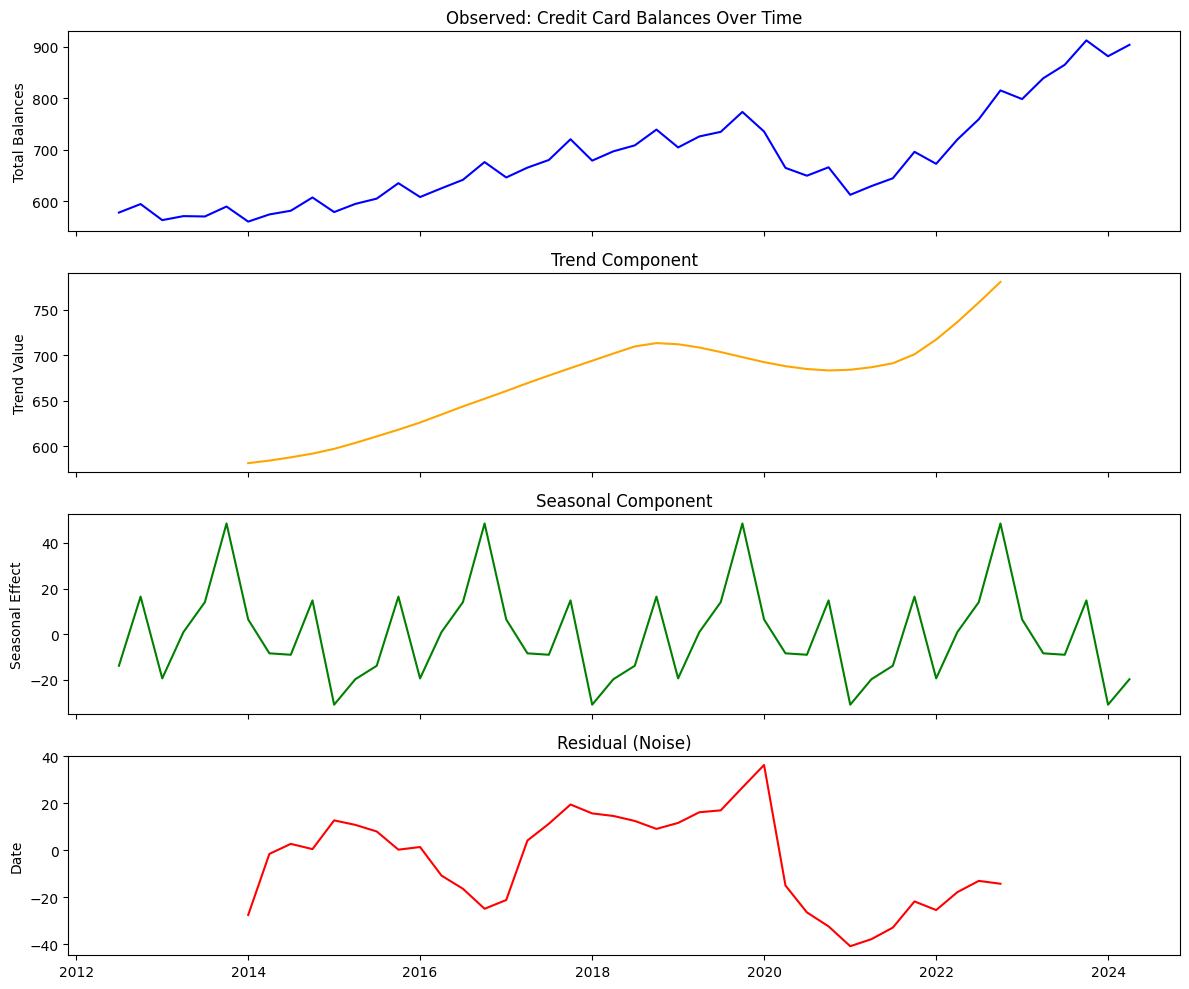

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Assuming 'data' is already defined and contains the 'VALUE' column
decomposition = seasonal_decompose(data['VALUE'], model='additive', period=12)
decomposition.plot()
plt.show()

# Seasonal Decomp w/ clearer titles
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# Observed
ax1.plot(data.index, data['VALUE'], color='blue')
ax1.set_title('Observed: Credit Card Balances Over Time')
ax1.set_ylabel('Total Balances')

# Trend
ax2.plot(decomposition.trend, color='orange')
ax2.set_title('Trend Component')
ax2.set_ylabel('Trend Value')

# Seasonal
ax3.plot(decomposition.seasonal, color='Green')
ax3.set_title('Seasonal Component')
ax3.set_ylabel('Seasonal Effect')

# Residuals
ax4.plot(decomposition.resid, color='red')
ax4.set_title('Residual (Noise)')
ax4.set_ylabel('Date')

plt.tight_layout()
plt.show()

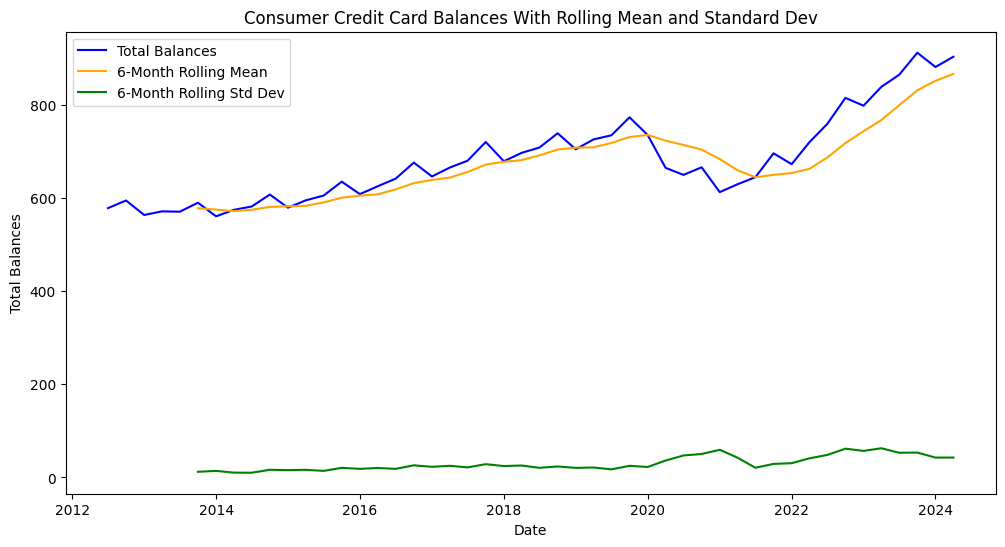

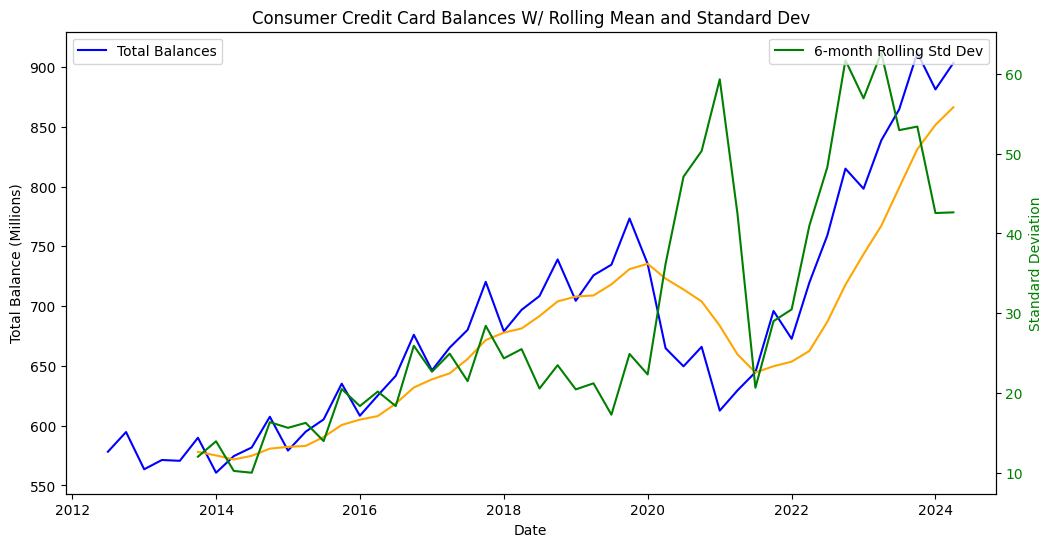

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'url' was defined previously, if not, uncomment and define it
url = 'https://fred.stlouisfed.org/series/RCCCBBALTOT/downloaddata/RCCCBBALTOT.csv'  # Define url here
# Load the data
data = pd.read_csv(url)  # Load data here
data['DATE'] = pd.to_datetime(data['DATE'])
data.set_index("DATE", inplace=True)

# Calulate 6-month rolling mean and rolling standard deviation
data['Rolling Mean (6 months)'] = data['VALUE'].rolling(window=6).mean()
data['Rolling Std Dev (6 months)'] = data['VALUE'].rolling(window=6).std()

# Plot
plt.figure(figsize=(12,6))
plt.plot(data.index, data['VALUE'], label="Total Balances", color='blue')
plt.plot(data.index, data['Rolling Mean (6 months)'], label='6-Month Rolling Mean', color='orange')
plt.plot(data.index, data['Rolling Std Dev (6 months)'], label="6-Month Rolling Std Dev", color='green')
plt.title('Consumer Credit Card Balances With Rolling Mean and Standard Dev')
plt.xlabel('Date')
plt.ylabel('Total Balances')
plt.legend()
plt.show()

# Clear any previous figures
plt.close('all')

%matplotlib inline

# Create a single figure and axis (ax1)
# The original line: fig.ax1 = plt.subplots(figsize=(12,6))
# is changed to correctly assign the figure and axes objects.
fig, ax1 = plt.subplots(figsize=(12,6)) # Assign the figure to 'fig' and the axes to 'ax1'.


# Plot total balances and Rolling Mean on Primary axis (ax1)
ax1.plot(data.index, data['VALUE'], label='Total Balances', color='blue')
# 'Rolling mean (6 months)' column name was incorrect; fixed to 'Rolling Mean (6 months)'
ax1.plot(data.index, data['Rolling Mean (6 months)'], color='orange') # Fixed the column name here.
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Balance (Millions)')

# Add a Secondary y-Axis for the rolling Standard Deviation (ax2)
ax2 = ax1.twinx()
ax2.plot(data.index, data['Rolling Std Dev (6 months)'], label='6-month Rolling Std Dev', color='green')
ax2.set_ylabel('Standard Deviation', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Set the title and legend
plt.title('Consumer Credit Card Balances W/ Rolling Mean and Standard Dev')
ax1.legend(loc='upper left')
ax2.legend(loc= 'upper right')

# Show the plot
plt.show()

# Consumer Credit Card Balances Analysis (2012-2024)

This notebook examines trends in consumer credit card balances, using data from the Federal Reserve Economic Data (FRED).

### Analysis Summary
1. **Total Balances and Rolling Averages**: Shows total balances with a 6-month rolling average and standard deviation to highlight trends and volatility.
2. **Yearly Growth Rate**: Highlights periods of accelerated growth or decline in balances.
3. **Seasonal Decomposition**: Breaks down data into trend, seasonal, and residual components.

### Key Insights
- **Significant Increase**: A sharp increase in credit card balances is observed starting in 2020, likely due to economic stimulus measures and increased consumer spending post-COVID-19.
- **Seasonal Patterns**: Peaks are visible around the end of each year, suggesting higher spending during the holiday season.

### Source
Data from [Federal Reserve Economic Data (FRED)](https://fred.stlouisfed.org/series/RCCCBBALTOT)
